In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prcp_query=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>="2016-08-24").\
filter(Measurement.date <="2017-08-23").all()

prcp_query

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_query)
prcp_df.head()


# Use Pandas Plotting with Matplotlib to plot the data

#convert date object to datetime object
prcp_df['date']=pd.to_datetime(prcp_df['date'])

#set date as index
prcp_df=prcp_df.set_index('date')

#rename column prcp to 'precipation'
prcp_df.rename(columns={'prcp':'precipitation'}, inplace=True)

prcp_df.head(10000)

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


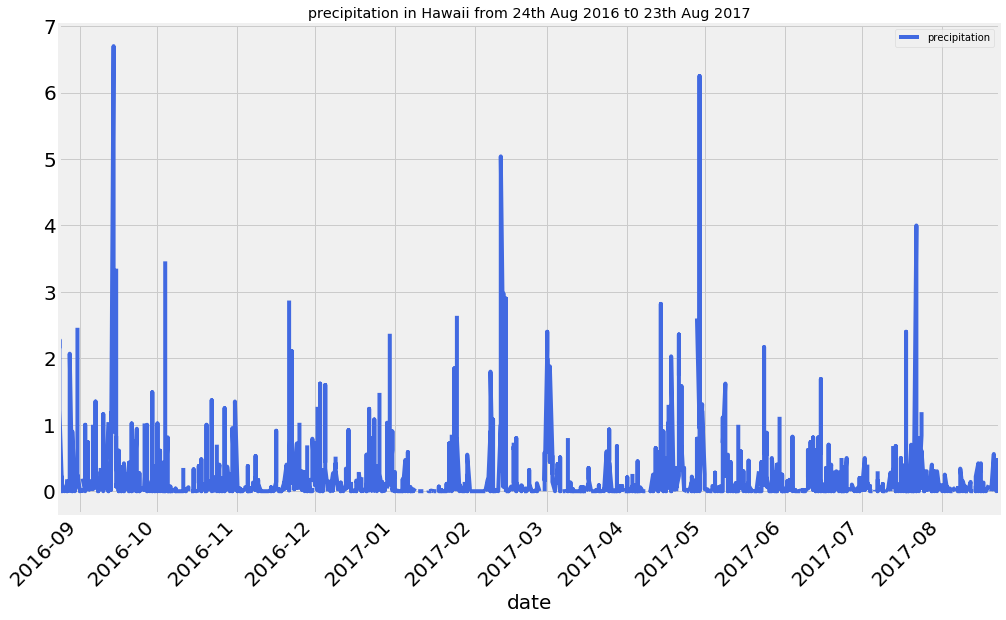

<Figure size 432x288 with 0 Axes>

In [44]:
prcp_df.plot(figsize=(15,10),   
             
             sort_columns=True,
             rot=45,
             use_index=True,
             title='precipitation in Hawaii from 24th Aug 2016 t0 23th Aug 2017',
             legend=True,
             fontsize=20,
             grid=True,
             color='royalblue')

plt.xlabel('date',fontsize=20)
plt.show()
plt.savefig("Figure1.png")
            
            
            

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(Station.id).count()
print(f'There are {station_count} weather stations in Hawaii.')

There are 9 weather stations in Hawaii.


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity= session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station ==Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [20]:
#station with highest activity
station_name= station_activity[0][1]
station_name

'WAIHEE 837.5, HI US'

#### Design a query to retrieve the last 12 months of temperature observation data (tobs). Filter by the station with the highest number of observations. Plot the result as histogram.

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperature=session.query(Measurement.tobs).\
filter(Station.station==Measurement.station).\
filter(Measurement.date>="2016-08-24").\
filter(Measurement.date <="2017-08-23").\
filter(Station.name =='WAIHEE 837.5, HI US').all()

#convert query to dataframe
tobs_df=pd.DataFrame(temperature)



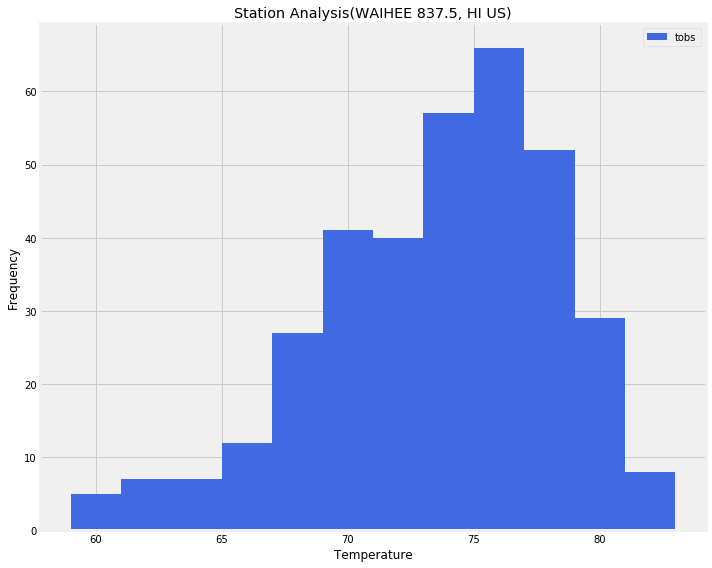

<Figure size 432x288 with 0 Axes>

In [45]:
#create plot

fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(tobs_df['tobs'], bins=12, color='royalblue', alpha=1)
ax.legend(['tobs'])
ax.set_title('Station Analysis(WAIHEE 837.5, HI US)')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig('Figure2.png')

# Temperature Analysis

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date="2016-01-01"
end_date="2016-12-"
temp=calc_temps(start_date,end_date)
temp


[(56.0, 74.14421827631008, 84.0)]

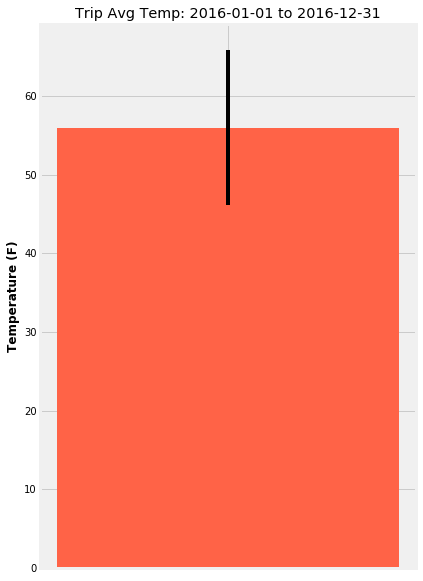

<Figure size 432x288 with 0 Axes>

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(6,10))
plt.bar(1,temp[0][0],yerr=(temp[0][2]-temp[0][1]),tick_label='',color='tomato')
plt.ylabel("Temperature (F)",weight="bold")
plt.title("Trip Avg Temp: %s to %s" % (start_date,end_date))
plt.show()
plt.savefig('Figure3.png')